<a href="https://colab.research.google.com/github/rehabshahzadi/ML_Learning/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis

This section presents a consolidated and clean version of the code for building a sentiment analysis model using the Sentiment140 dataset, following the Machine Learning Development Life Cycle.

### 1. Authenticate and Download Data

(Assuming `kaggle.json` is in `/content/` and Kaggle library is installed)

In [62]:
import os

# Create the .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move the kaggle.json file to the .kaggle directory
!cp /content/kaggle.json /root/.kaggle/kaggle.json

# Set permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d kazanova/sentiment140

# Unzip the downloaded dataset
!unzip -o /content/sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


### 2. Load and Explore Data

In [63]:
import pandas as pd

# Define column names
column_names = ["target", "ids", "date", "flag", "user", "text"]

# Load the dataset
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=column_names)

# Display the first 5 rows
display(df.head())

# Display dataset information and summary statistics (optional but good practice)
# display(df.info())
# display(df.describe())

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Sentiment distribution visualization

### Subtask:
Visualize the distribution of positive and negative sentiments in the dataset.


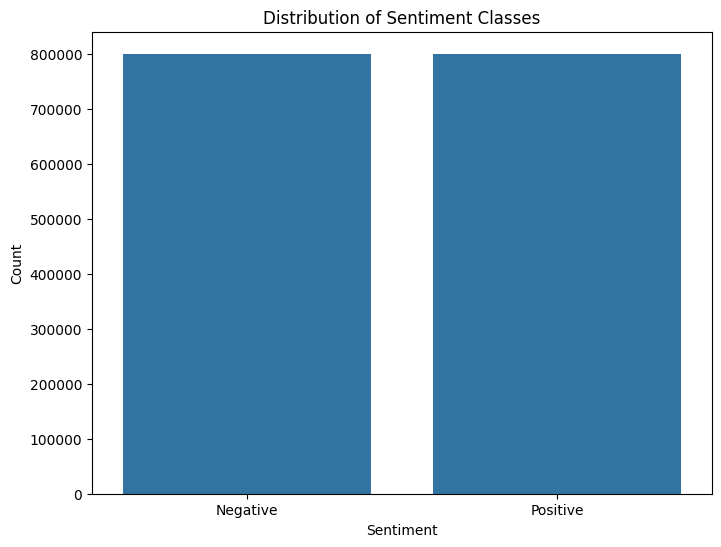

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment class
sentiment_counts = df['target'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)

# Add title and labels
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive']) # Assuming 0 is Negative and 4 is Positive based on data exploration

# Display the plot
plt.show()

### 3. Preprocess Data

In [65]:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers, keep only letters and spaces
    text = re.sub(r'[^A-Za-z\s]+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows with cleaned text
display(df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


### 4. Feature Extraction

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the resulting feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

Shape of TF-IDF feature matrix: (1600000, 5000)


### 5. Model Training and Evaluation

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79045
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



### 6. Sentiment Prediction (Example)

In [68]:
# Example of predicting sentiment on new text data

# New text data
new_texts = ["This is a great movie!", "I am feeling very sad today.", "Neutral statement."]

# Preprocess the new texts
cleaned_new_texts = [preprocess_text(text) for text in new_texts]

# Transform the new texts using the trained TF-IDF vectorizer
X_new = tfidf_vectorizer.transform(cleaned_new_texts)

# Predict sentiment
predictions = model.predict(X_new)

# Map predictions back to sentiment labels (0 for negative, 4 for positive in this dataset)
sentiment_labels = {0: "Negative", 4: "Positive"}
predicted_sentiments = [sentiment_labels[pred] for pred in predictions]

# Display predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: '{text}' -> Predicted Sentiment: {sentiment}")

Text: 'This is a great movie!' -> Predicted Sentiment: Positive
Text: 'I am feeling very sad today.' -> Predicted Sentiment: Negative
Text: 'Neutral statement.' -> Predicted Sentiment: Positive


## Model Evaluation - Confusion Matrix

### Subtask:
Visualize the model's performance using a confusion matrix.

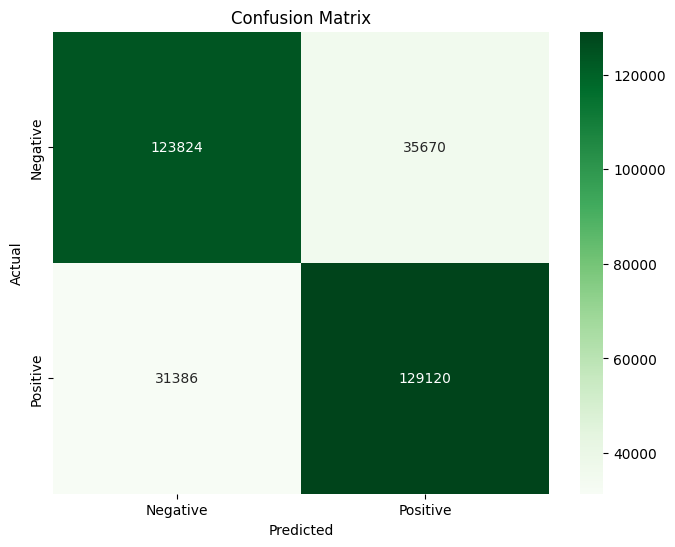

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## More evaluation metrics

### Subtask:
Calculate and visualize additional evaluation metrics like the ROC curve and AUC.


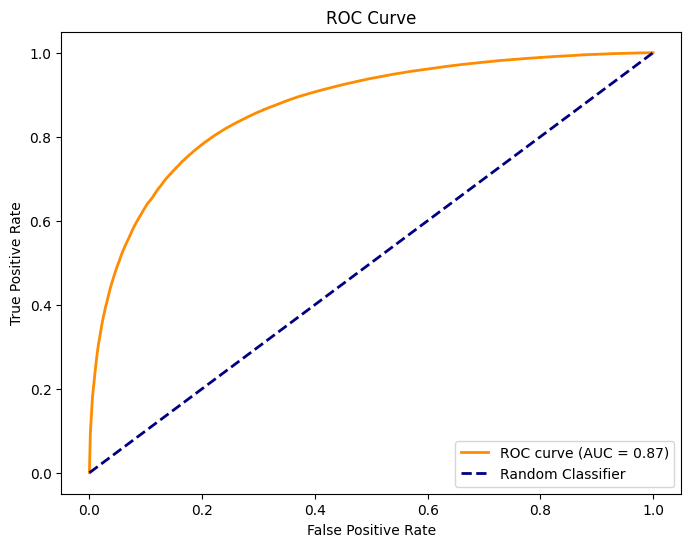

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 4)
# The positive class in this dataset is 4.
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=4)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Top feature analysis

### Subtask:
Identify and visualize the most important features (words) that contribute to sentiment prediction.


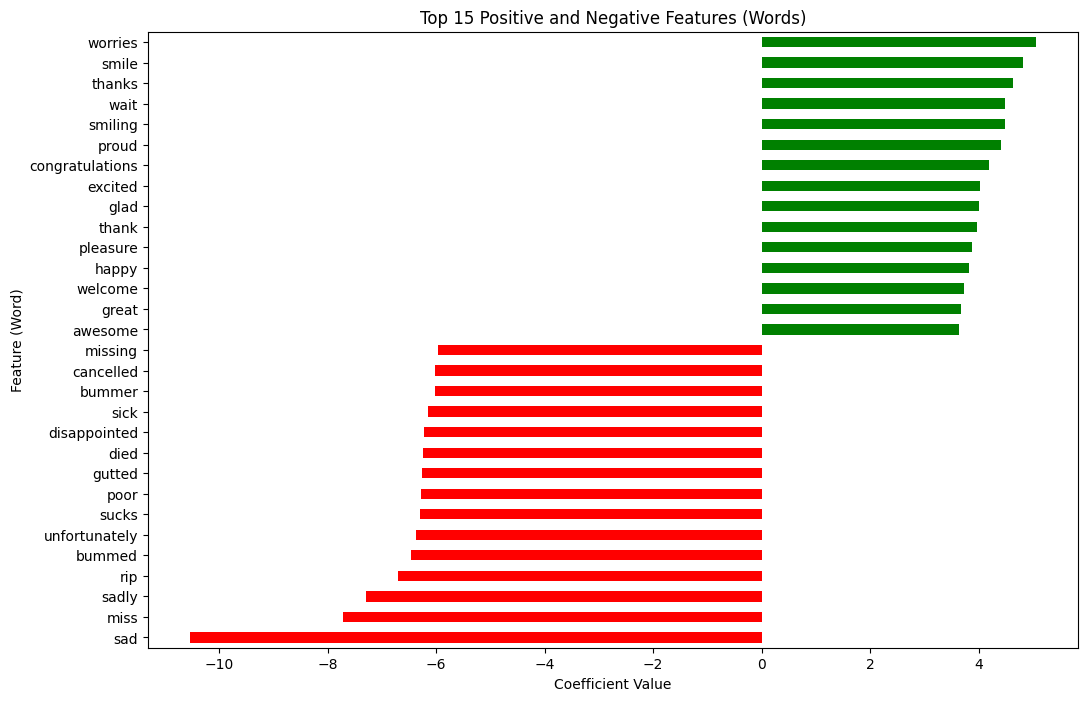

In [71]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a pandas Series mapping feature names to coefficients
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort features by their coefficients
sorted_features = feature_importance.sort_values(ascending=False)

# Select the top N positive and top N negative features
top_n = 15
top_positive_features = sorted_features.head(top_n)
top_negative_features = sorted_features.tail(top_n)

# Combine top positive and negative features for plotting
top_features = pd.concat([top_positive_features, top_negative_features])

# Visualize the top positive and negative features
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_features.values]
top_features.plot(kind='barh', color=colors)
plt.title(f'Top {top_n} Positive and Negative Features (Words)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature (Word)')
plt.gca().invert_yaxis() # Invert y-axis to show the highest coefficients at the top
plt.show()

## Interactive prediction and Explanation

### Subtask:
Create an interactive section where the user can input text and get a sentiment prediction.Analyze the input text and explain which words contribute most to the predicted sentiment.



In [72]:
import numpy as np

def predict_sentiment_interactive(text, top_n_words=5):
    """
    Predicts the sentiment of a given text input and explains the prediction
    based on the most influential words.

    Args:
        text (str): The input text string.
        top_n_words (int): The number of top influential words to include in the explanation.

    Returns:
        tuple: A tuple containing:
            - str: The predicted sentiment label ('Negative' or 'Positive').
            - str: An explanation of the prediction based on influential words.
    """
    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Transform the preprocessed text using the fitted TF-IDF vectorizer
    X_new = tfidf_vectorizer.transform([cleaned_text]) # Pass as a list

    # Predict sentiment using the trained model
    prediction = model.predict(X_new)[0] # Get the single prediction
    predicted_sentiment = sentiment_labels[prediction]

    # --- Explanation part ---
    explanation = f"Predicted Sentiment: {predicted_sentiment}\n"
    explanation += "Explanation based on influential words:\n"

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the coefficients of the model
    coefficients = model.coef_[0]

    # Get the indices of the non-zero features in the input text
    # These are the words from the input text that are present in the TF-IDF vocabulary
    feature_indices = X_new.indices

    if len(feature_indices) > 0:
        # Get the names and coefficients of the features present in the input text
        present_feature_names = [feature_names[i] for i in feature_indices]
        present_coefficients = [coefficients[i] for i in feature_indices]

        # Create a list of tuples (word, coefficient)
        word_coefficient_pairs = list(zip(present_feature_names, present_coefficients))

        # Sort the words by the absolute value of their coefficients in descending order
        word_coefficient_pairs.sort(key=lambda item: abs(item[1]), reverse=True)

        # Select the top N words
        top_influential_words = word_coefficient_pairs[:top_n_words]

        if top_influential_words:
            for word, coef in top_influential_words:
                sentiment_contribution = "positive" if coef > 0 else "negative"
                explanation += f"- '{word}' (coefficient: {coef:.4f}, contributes to {sentiment_contribution} sentiment)\n"
        else:
            explanation += "No recognized words in the vocabulary found in the input text."
    else:
        explanation += "No recognized words in the vocabulary found in the input text."


    return predicted_sentiment, explanation

# Test the function with sample texts and print the explanation
sample_text = "I am so happy with the results!"
predicted_sentiment, explanation = predict_sentiment_interactive(sample_text)
print(explanation)

sample_text_negative = "This is a terrible day."
predicted_sentiment_negative, explanation_negative = predict_sentiment_interactive(sample_text_negative)
print(explanation_negative)

sample_text_neutral = "This is a statement."
predicted_sentiment_neutral, explanation_neutral = predict_sentiment_interactive(sample_text_neutral)
print(explanation_neutral)

Predicted Sentiment: Positive
Explanation based on influential words:
- 'happy' (coefficient: 3.8245, contributes to positive sentiment)
- 'with' (coefficient: 1.2263, contributes to positive sentiment)
- 'am' (coefficient: -0.6528, contributes to negative sentiment)
- 'so' (coefficient: -0.5281, contributes to negative sentiment)
- 'results' (coefficient: -0.4972, contributes to negative sentiment)

Predicted Sentiment: Negative
Explanation based on influential words:
- 'terrible' (coefficient: -4.3429, contributes to negative sentiment)
- 'is' (coefficient: -0.8407, contributes to negative sentiment)
- 'this' (coefficient: -0.1912, contributes to negative sentiment)
- 'day' (coefficient: 0.0467, contributes to positive sentiment)

Predicted Sentiment: Positive
Explanation based on influential words:
- 'is' (coefficient: -0.8407, contributes to negative sentiment)
- 'statement' (coefficient: 0.6702, contributes to positive sentiment)
- 'this' (coefficient: -0.1912, contributes to nega